In [1]:
import tensorflow as tf
from keras import Sequential

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


## Building the Model

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2), #for avoiding overfitting
    tf.keras.layers.Dense(10,activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
mdl= model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2930 - accuracy: 0.9149 - val_loss: 0.1359 - val_accuracy: 0.9588
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1395 - accuracy: 0.9585 - val_loss: 0.0976 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1056 - accuracy: 0.9683 - val_loss: 0.0805 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0860 - accuracy: 0.9728 - val_loss: 0.0811 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.0756 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0639 - accuracy: 0.9796 - val_loss: 0.0754 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - accuracy: 0.9811 - val_loss: 0.0759 - val_accuracy:

## Visualising Loss Per Iteration 

In [6]:
import matplotlib.pyplot as plt

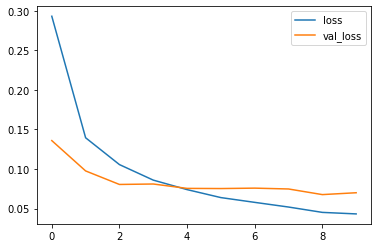

In [7]:
plt.plot(mdl.history['loss'],label='loss')
plt.plot(mdl.history['val_loss'], label= 'val_loss')
plt.legend()

## Visualising Accuracy Per Iteration

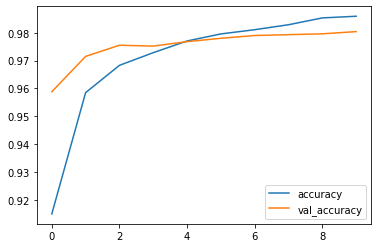

In [8]:
plt.plot(mdl.history['accuracy'],label='accuracy')
plt.plot(mdl.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

## Evaluating the Model

In [9]:
print(model.evaluate(x_test,y_test)) #1st value represents overallthe sum of loss, 2nd value represents accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9804
[0.07007239758968353, 0.980400025844574]


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
ptest= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,ptest)
print(cm)

[[ 974    0    1    0    1    1    0    1    2    0]
 [   0 1124    2    1    0    0    2    0    6    0]
 [   2    0 1017    0    2    0    2    5    4    0]
 [   0    0    5  986    0    7    0    4    2    6]
 [   2    0    2    0  958    0    4    5    1   10]
 [   2    0    0    8    2  876    2    0    1    1]
 [   5    2    2    0    2    7  937    0    3    0]
 [   2    7    7    1    1    0    0 1004    1    5]
 [   4    0    6    4    2    4    1    5  945    3]
 [   2    3    0    3    6    3    2    6    1  983]]


In [13]:
model.save("number_reader.model")

INFO:tensorflow:Assets written to: number_reader.model\assets
